In [2]:
import pandas as pd

# Make sure the filename is correct (case-sensitive!)
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Convert TotalCharges to float, coercing bad data to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df['TotalCharges'].isnull().sum()

11

In [7]:
# Drop rows where TotalCharges couldn't be converted
df = df.dropna(subset=['TotalCharges'])

# Convert SeniorCitizen to Yes/No
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Drop customerID (not useful for analysis)
df.drop('customerID', axis=1, inplace=True)

C:\Users\Samia\AppData\Local\Temp\ipykernel_1620\2694924310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
C:\Users\Samia\AppData\Local\Temp\ipykernel_1620\2694924310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('customerID', axis=1, inplace=True)


In [8]:
df.loc[:, 'SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
df = df.drop('customerID', axis=1)

KeyError: "['customerID'] not found in axis"

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [11]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

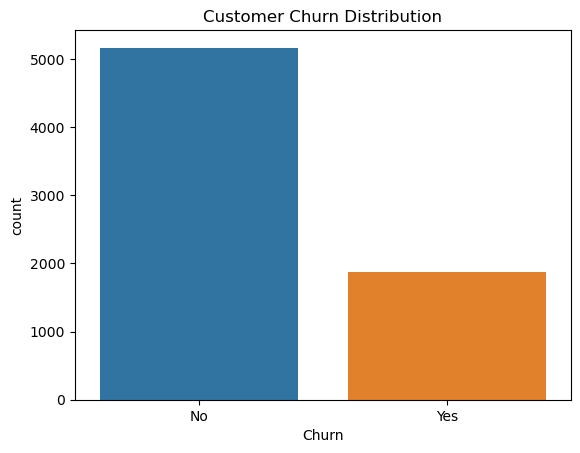

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

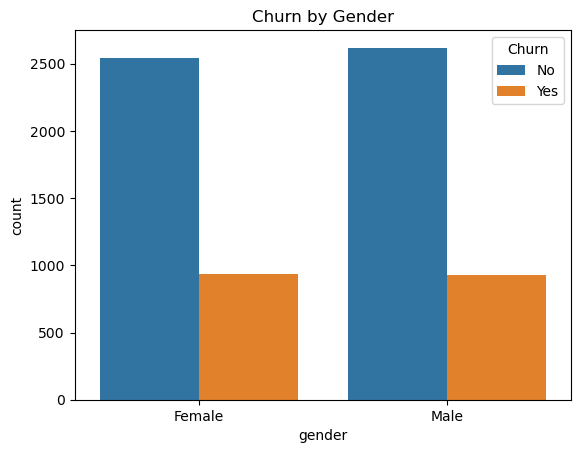

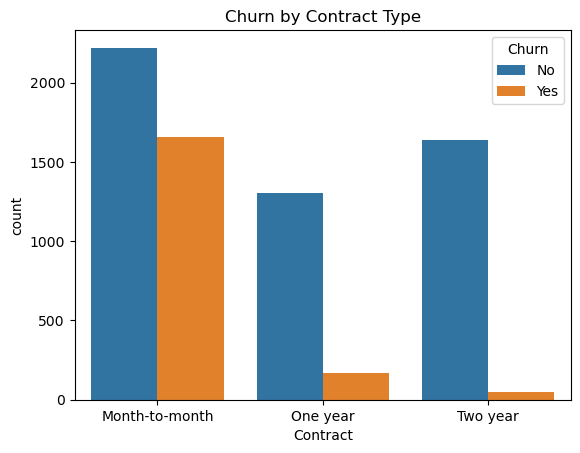

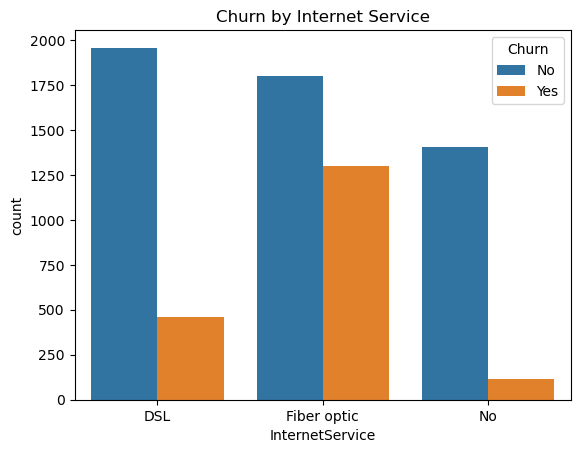

In [13]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()

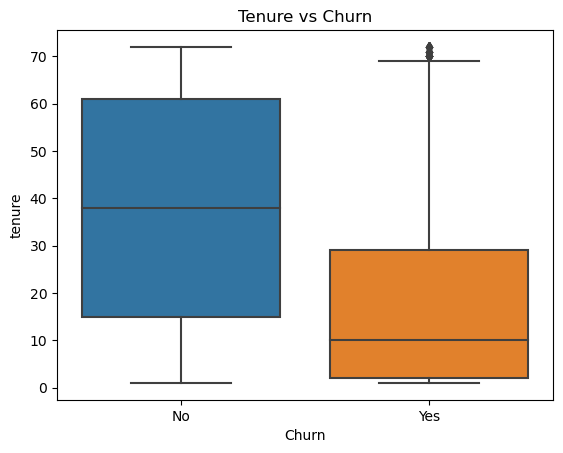

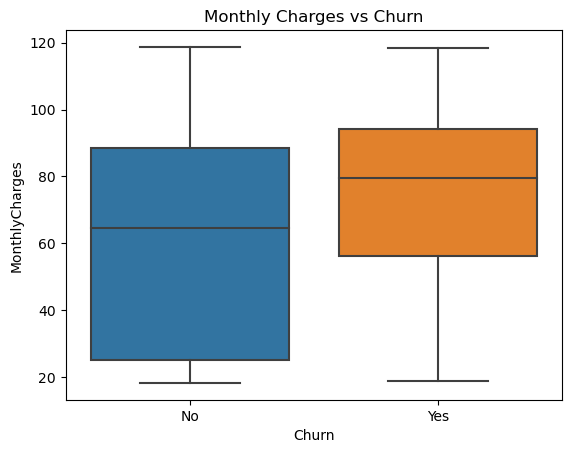

In [14]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

<Axes: xlabel='Contract', ylabel='count'>

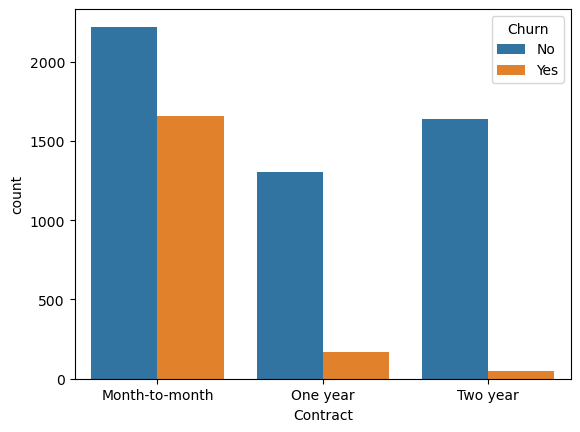

In [15]:
sns.countplot(x='Contract', hue='Churn', data=df)

## 📊 Exploratory Data Analysis Summary: Customer Churn

We performed exploratory data analysis to understand the patterns behind customer churn in a telecom company. Below are key findings from visualizations:

- **Contract Type**: Customers on **month-to-month** contracts have the highest churn rate, while those on one- or two-year contracts are far less likely to leave. This is one of the most significant drivers of churn.
- **Tenure**: Customers with **shorter tenure** are significantly more likely to churn. The longer a customer stays, the less likely they are to leave.
- **Monthly Charges**: Customers who churn tend to have **higher monthly charges**, suggesting that price sensitivity could be contributing to churn.
- **Internet Service Type**: Customers using **fiber optic** internet service churn more than DSL or those without internet. This may relate to pricing, satisfaction, or service reliability.
- **Gender**: No notable difference in churn rates between male and female customers. This feature may not provide predictive value.

In [34]:
# 2. Encode binary categorical columns (like 'Yes'/'No')
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# 3. Convert SeniorCitizen from object to int safely
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce').fillna(0).astype(int)

# 4. One-hot encode multi-category columns (only if not already done)
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'gender']

existing_multi_cat_cols = [col for col in multi_cat_cols if col in df.columns]
df = pd.get_dummies(df, columns=existing_multi_cat_cols, drop_first=True)

# 5. Drop target column and split into features/target
X = df.drop('Churn', axis=1)
y = df['Churn']

# 6. Output checks
print("\n✅ Preprocessing complete!")
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
print("\nFirst 5 rows of processed features:")
print(X.head())




✅ Preprocessing complete!
Shape of features (X): (7032, 30)
Shape of target (y): (7032,)

First 5 rows of processed features:
   SeniorCitizen  Partner  Dependents  tenure  PhoneService  PaperlessBilling  \
0              0      NaN         NaN       1           NaN               NaN   
1              0      NaN         NaN      34           NaN               NaN   
2              0      NaN         NaN       2           NaN               NaN   
3              0      NaN         NaN      45           NaN               NaN   
4              0      NaN         NaN       2           NaN               NaN   

   MonthlyCharges  TotalCharges  InternetService_Fiber optic  \
0           29.85         29.85                        False   
1           56.95       1889.50                        False   
2           53.85        108.15                        False   
3           42.30       1840.75                        False   
4           70.70        151.65                         True   

 

In [35]:
print(df.isnull().sum())
print(df.dtypes)

SeniorCitizen                               0
Partner                                  7032
Dependents                               7032
tenure                                      0
PhoneService                             7032
PaperlessBilling                         7032
MonthlyCharges                              0
TotalCharges                                0
Churn                                    7032
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No internet service            0
OnlineBackup_Yes                  

In [36]:
print(df.isnull().sum())

SeniorCitizen                               0
Partner                                  7032
Dependents                               7032
tenure                                      0
PhoneService                             7032
PaperlessBilling                         7032
MonthlyCharges                              0
TotalCharges                                0
Churn                                    7032
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No internet service            0
OnlineBackup_Yes                  

In [37]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if col in df.columns and df[col].notna().sum() > 0:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

In [38]:
print(df.isnull().sum())

SeniorCitizen                               0
Partner                                  7032
Dependents                               7032
tenure                                      0
PhoneService                             7032
PaperlessBilling                         7032
MonthlyCharges                              0
TotalCharges                                0
Churn                                    7032
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No internet service            0
OnlineBackup_Yes                  

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5625, 30)
Test shape: (1407, 30)


In [43]:
model = LogisticRegression(max_iter=1000)
from sklearn.impute import SimpleImputer

# Create an imputer that replaces missing values with the column mean (good for numeric columns)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model.fit(X_train, y_train)

C:\Users\Samia\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['Partner' 'Dependents' 'PhoneService' 'PaperlessBilling']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\Samia\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['Partner' 'Dependents' 'PhoneService' 'PaperlessBilling']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Input y contains NaN.

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Separate numerical and categorical columns
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'InternetService', 'Contract', 'PaymentMethod']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Final pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [45]:
model.fit(X_train, y_train)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Load your data
df = pd.read_csv("your_data.csv")

# --------------------------
# 🛠️ Fix 1: Convert boolean columns to string or integer
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(str)  # or use astype(int) if preferred

# 🛠️ Fix 2: Drop columns that are entirely NaN
df = df.dropna(axis=1, how='all')

# --------------------------
# Split the data
X = df.drop("target_column", axis=1)  # replace with your actual target column name
y = df["target_column"]

# Ensure X is a DataFrame when splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# Define column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# --------------------------
# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# --------------------------
# Final pipeline with classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# --------------------------
# Train the model
model.fit(X_train, y_train)

# Done! 🎉 You can now predict, score, etc.


FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# 1. Load your data
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") 

# 2. Clean boolean columns (convert to int)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# 3. Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# 4. Separate features and target
X = df.drop("Churn", axis=1)  # Replace with your actual target column name
y = df["Churn"]

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Select column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# 7. Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 8. Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# 9. Full pipeline with Logistic Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 10. Fit the model
model.fit(X_train, y_train)

# 11. Evaluate
accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8261178140525195


In [49]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

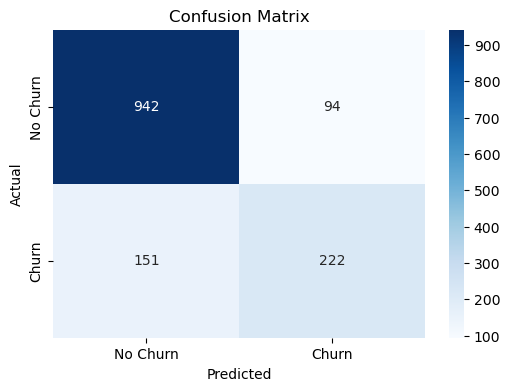

In [50]:
# Get predictions
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [51]:
# Print report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.60      0.64       373

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409



In [52]:
# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[::,1]

# Compute ROC values
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

ValueError: y_true takes value in {'No', 'Yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

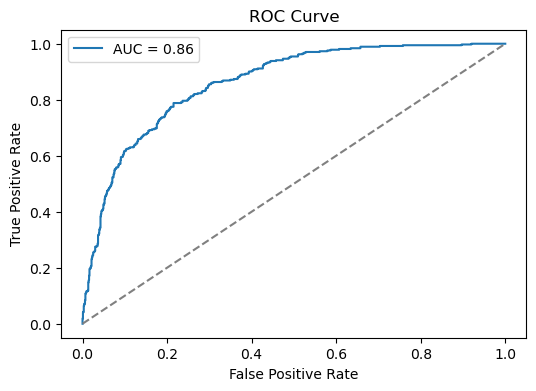

In [53]:
# Convert target values to 0 (No) and 1 (Yes)
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})
# Compute ROC values
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()